## Linear Regression with temperature data

In [36]:
import numpy as np
import pandas as pd
import scipy, scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
import statsmodels.api as sm
import math
from sklearn.neighbors import KNeighborsRegressor

In [37]:
data = pd.read_json("monthly_json.json") 
data['Date'] = pd.to_datetime(data['Date'])

In [38]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')

In [39]:
GCAG_data = pivot_df['GCAG']

X = GCAG_data.index.values.astype(np.int64) / 1000000000 
X = X.reshape(-1, 1)
y = pivot_df['GCAG'].values

## Linear regression on the entire dataset 

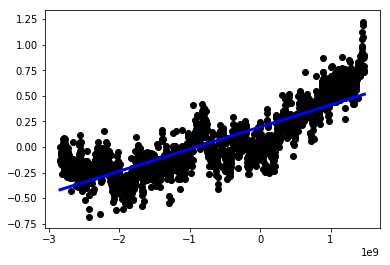

In [40]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_predict = regr.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, y_predict, color='blue', linewidth=3)
plt.show()

## Split the data set

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=11)

In [84]:
X_train.shape

(1101, 1)

In [85]:
y_train.shape

(1101,)

## Training Error (Linear Regression)

In [44]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)

In [45]:
print (regr.coef_)
print (regr.intercept_)

[2.16357807e-10]
0.19708455343741857


In [46]:
newdf = pd.DataFrame(y_predict)
newdf['Test'] = y_test
newdf.columns = ['Predict','Test']
newdf.head()

,Predict,Test
0,-0.030993,-0.0557
1,0.209104,-0.0763
2,0.445220,0.5499
3,0.380952,0.3893
4,-0.041797,-0.2894


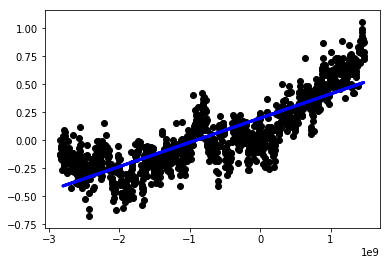

In [47]:
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_test, y_predict, color='blue', linewidth=3)
plt.show()

In [49]:
# Get some more information
Y = y_predict
t = X_test
t = sm.add_constant(t,prepend=False)

model = sm.OLS(Y,t)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.149e+33
Date:                Tue, 21 Aug 2018   Prob (F-statistic):               0.00
Time:                        17:46:23   Log-Likelihood:                 19314.
No. Observations:                 543   AIC:                        -3.862e+04
Df Residuals:                     541   BIC:                        -3.862e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.164e-10   3.02e-27   7.18e+16      0.000    2.16e-10    2.16e-10
const          0.1971   4.26e-18   4.63e+16      0.000       0.197       0.197
==============================================================================
Omnibus:                        0.657   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.542
Skew:                           0.072   Prob(JB):                        0.763
Kurtosis:                       3.057   Cond. No.                     1.62e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Error functions

In [50]:
def rss (X_test,y_test):
    return ("Residual sum of squares(RSS): %.2f"% ((regr.predict(X_test) - y_test) ** 2).sum())

def rse (X_test,y_test):
     return("Residual standard error(RSE): %.2f"% math.sqrt((((regr.predict(X_test) - y_test) ** 2).sum())/(len(X_test)-2)))

def tss (X_test,y_test):
    return ("Total sum of squares(TSS): %.2f"%((regr.predict(X_test) - y_test.mean()) ** 2).sum())

def r_squared (X_test,y_test):
    TSS = (((regr.predict(X_test) - y_test.mean()) ** 2).sum())
    RSS = (((regr.predict(X_test) - y_test) ** 2).sum())
    return("R squared: %.2f"% (1-RSS/TSS))

**RSS**<br/>
This is a measure of the discrepancy between the data and an estimation model.

In [51]:
rss(X_test,y_test)

'Residual sum of squares(RSS): 18.83'

**RSE**<br/>This tells us how much we'd be off by according to the implied relationship even if the model were correct for the given data and the slope and intercept were known exactly. MSE let's us compare two different tests. This doesn't really let us know how good it is, but we know if one model is better than the other.

In [52]:
rse(X_test,y_test)

'Residual standard error(RSE): 0.19'

**TSS**<br/> This measures the total variance in the response. It can be thought of as the variability inherent in the response before the regression is performed.

In [53]:
tss(X_test,y_test)

'Total sum of squares(TSS): 38.53'

**R squared**<br/> This is independent of the scale of y and takes on a value from 0 (which indicates a problem with the model or the inherent error is high or both) to 1. It measures the proportion of variability in y that can be explained using X.

In [54]:
r_squared(X_test,y_test)

'R squared: 0.51'

## k Neighbors Regression with temperature data

**The following is from Matthias, my clumsy functions are in another notebook**

In [71]:
GCAG_df = pd.DataFrame(GCAG_data)
for i in range(0,5):
    k = i * 25 + 1
    knr = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knr.fit(X, y) 
    # Ich addiere eine Konstante auf alle Werte um die Linien meiner Funktionen übereinander darzustellen
    GCAG_df['Neighbors: ' + str(k)] = knr.predict(X) + i + 1

In [72]:
GCAG_df.head()

,GCAG,Neighbors: 1,Neighbors: 26,Neighbors: 51,Neighbors: 76,Neighbors: 101
Date,,,,,,
1880-01-06,0.0009,1.0009,1.922912,2.89899,3.862855,4.838465
1880-02-06,-0.1229,0.8771,1.922912,2.89899,3.862855,4.838465
1880-03-06,-0.1357,0.8643,1.922912,2.89899,3.862855,4.838465
1880-04-06,-0.0499,0.9501,1.922912,2.89899,3.862855,4.838465
1880-05-06,-0.0738,0.9262,1.922912,2.89899,3.862855,4.838465


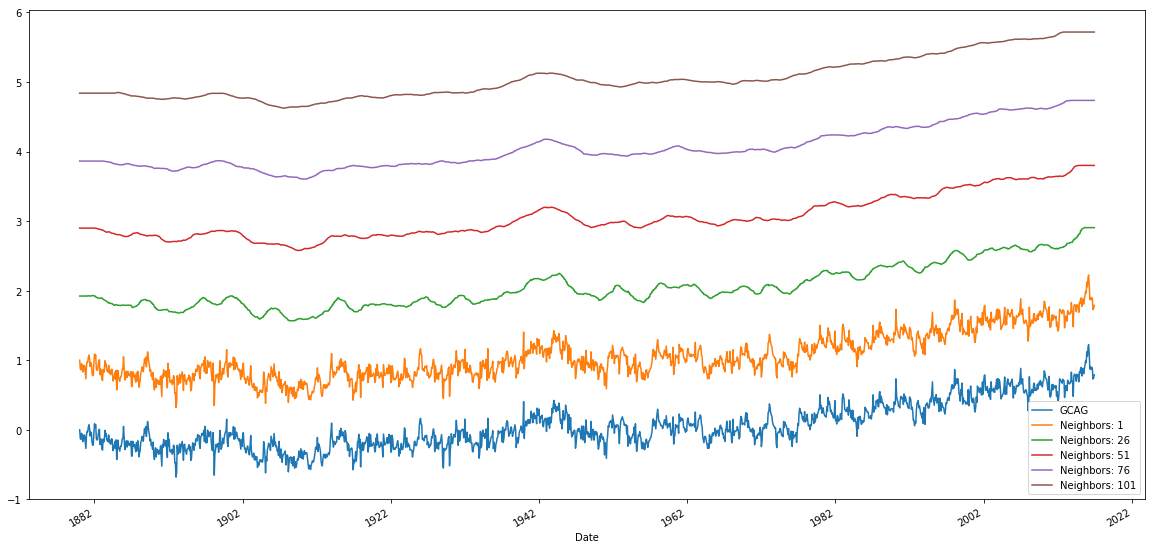

In [73]:
GCAG_df.plot(figsize=(20, 10));

**Here's where my stuff starts**<br/> I don't know if I have the right input for these calculations. I just used all the test data (test data for KNR)

In [102]:
knrg = KNeighborsRegressor(n_neighbors=k, weights='uniform')
knrg.fit(X_train2,y_train2)
y_predicts = knrg.predict(X_test2)

In [103]:
rss(X_test2,y_test2)

'Residual sum of squares(RSS): 15.95'

In [104]:
rse(X_test2,y_test2)

'Residual standard error(RSE): 0.17'

In [105]:
tss(X_test2,y_test2)

'Total sum of squares(TSS): 37.71'

In [106]:
r_squared(X_test2,y_test2)

'R squared: 0.58'